### 作業
目前已經學過許多的模型，相信大家對整體流程應該比較掌握了，這次作業請改用**手寫辨識資料集**，步驟流程都是一樣的，請試著自己撰寫程式碼來完成所有步驟

In [1]:
from sklearn import datasets, metrics
digits = datasets.load_digits()

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [3]:
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

(1797, 64) (1797,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


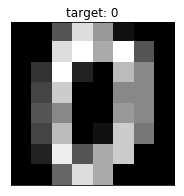

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [4]:
#check image data
print(digits.data.shape, digits.target.shape)
print(type(digits.data), type(digits.target))
def pick_up(dataset, target, pick_up_idx = 0):
    plt.figure(figsize=(3, 3))
    #pick_up_idx = np.random.choice(dataset.shape[0])
    pick_up_img = dataset[pick_up_idx, :].reshape(8, 8)
    plt.imshow(pick_up_img, cmap='gray')
    plt.title('target: '+str(target[pick_up_idx]))
    plt.xticks([])
    plt.yticks([])
    plt.show()
    return pick_up_img

pick_up(digits.data, digits.target)

In [5]:
def predict_image(dataset_df, target, clf):
    plt.figure(figsize=(3, 3))
    pick_up_idx = np.random.choice(dataset_df.shape[0])
    dataset_df = dataset_df.reset_index(drop=True)
    pick_up_img = dataset_df.loc[pick_up_idx].values
    pick_up_img = pick_up_img.reshape(8, 8)
    plt.imshow(pick_up_img, cmap='gray')
    print('pick_up_idx_test_idx:', pick_up_idx)
    y_pred = clf.predict(dataset_df.loc[pick_up_idx].values.reshape(-1, 64))
    ans = (target[pick_up_idx] == y_pred)
    plt.title('target: '+str(target[pick_up_idx])+'  predict:' + str(y_pred)+ '  Ans:' +str(ans))
    plt.xticks([])
    plt.yticks([])
    plt.show()
    return pick_up_img

In [6]:
#Data_preprosessing 
ss_scaler = StandardScaler()
digits_data_ss = ss_scaler.fit_transform(digits.data.T)
digits_data_ss = digits_data_ss.T
digits_df_ss = pd.DataFrame(digits_data_ss)
digits_df_target = pd.get_dummies(digits.target)
digits_df = pd.DataFrame(digits.data)
#split to train and test set
x_train_ss, x_test_ss, y_train_ss, y_test_ss = train_test_split(digits_df_ss, digits.target, random_state=123)
x_train, x_test, y_train, y_test = train_test_split(digits_df, digits.target, random_state=123)


In [7]:
#Logistic_Regression
LR_clf = LogisticRegression()
LR_result = cross_val_score(LR_clf, x_train_ss, y_train_ss, scoring='accuracy', cv=5)
LR_clf.fit(x_train_ss, y_train_ss)
print('LR_result:{:.3} +/- {:.3}\n{}'.format(np.mean(LR_result), np.std(LR_result)*2, LR_result))
LR_cv_clf = LogisticRegressionCV(cv=5, scoring='accuracy', multi_class='multinomial')
LR_cv_clf.fit(x_train_ss, y_train_ss)
y_pred_LR = LR_cv_clf.predict(x_test_ss)
#print('LR_CV:', LR_cv_clf.coef_)
print('LR_CV_C:', LR_cv_clf.Cs, LR_cv_clf.Cs_, LR_cv_clf.C_)
print('test_score:', np.mean(y_pred_LR == y_test_ss), metrics.accuracy_score(y_test_ss, y_pred_LR))


LR_result:0.963 +/- 0.025
[0.97069597 0.96691176 0.94095941 0.9588015  0.97727273]
LR_CV_C: 10 [1.00000000e-04 7.74263683e-04 5.99484250e-03 4.64158883e-02
 3.59381366e-01 2.78255940e+00 2.15443469e+01 1.66810054e+02
 1.29154967e+03 1.00000000e+04] [0.35938137 0.35938137 0.35938137 0.35938137 0.35938137 0.35938137
 0.35938137 0.35938137 0.35938137 0.35938137]
test_score: 0.96 0.96


pick_up_idx_test_idx: 274


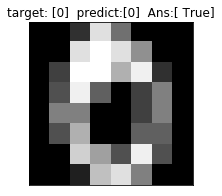

pick_up_idx_test_idx: 302


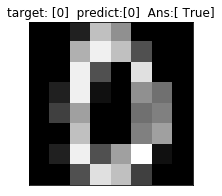

In [8]:
_ = predict_image(x_test_ss, y_test_ss.reshape(-1, 1), LR_clf)
_ = predict_image(x_test_ss, y_test_ss.reshape(-1, 1), LR_cv_clf)

In [9]:
LR_confusion = pd.DataFrame(metrics.confusion_matrix(y_test, LR_clf.predict(x_test_ss)), 
                             columns=digits.target_names, index=digits.target_names)
LR_confusion

,0,1,2,3,4,5,6,7,8,9
0,51,0,0,0,0,0,0,0,0,0
1,0,41,0,0,0,0,1,0,0,0
2,0,0,41,0,0,0,0,0,0,0
3,0,0,0,40,0,0,0,0,0,0
4,0,1,0,0,50,0,0,1,0,0
5,1,0,0,0,0,44,0,0,0,3
6,0,0,0,0,1,0,47,0,0,0
7,0,0,0,0,0,0,0,41,0,0
8,0,4,0,1,0,0,0,0,40,0
9,0,1,0,1,0,0,0,0,1,39


In [10]:
LR_cv_confusion = pd.DataFrame(metrics.confusion_matrix(y_test, y_pred_LR), 
                             columns=digits.target_names, index=digits.target_names)
LR_cv_confusion

,0,1,2,3,4,5,6,7,8,9
0,51,0,0,0,0,0,0,0,0,0
1,0,42,0,0,0,0,0,0,0,0
2,0,0,41,0,0,0,0,0,0,0
3,0,0,0,39,0,0,0,0,1,0
4,0,0,0,0,50,0,0,1,0,1
5,0,0,0,0,0,43,0,0,0,5
6,0,1,0,0,1,0,46,0,0,0
7,0,0,0,0,0,0,0,41,0,0
8,0,5,0,0,0,0,0,0,39,1
9,0,1,0,1,0,0,0,0,0,40


GBC_result:0.956 +/- 0.0124 with 95% CI
[0.95238095 0.95955882 0.96678967 0.95131086 0.95075758]
GBC_test_score: 0.9577777777777777 0.9577777777777777
pick_up_idx_test_idx: 355


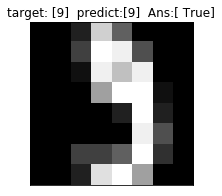

,0,1,2,3,4,5,6,7,8,9
0,50,0,0,0,0,0,1,0,0,0
1,0,42,0,0,0,0,0,0,0,0
2,0,0,39,0,0,0,0,2,0,0
3,0,0,0,39,0,0,0,0,1,0
4,0,1,0,0,50,0,0,1,0,0
5,0,0,0,0,0,42,0,0,1,5
6,0,1,0,0,0,1,46,0,0,0
7,1,0,0,0,0,0,0,40,0,0
8,0,2,0,0,0,0,0,0,43,0
9,0,0,0,0,0,0,0,1,1,40


In [11]:
#GradientBoostingClassifier
GBC_clf = GradientBoostingClassifier()
GBC_result = cross_val_score(GBC_clf, x_train, y_train, scoring='accuracy', cv=5)
GBC_clf.fit(x_train, y_train)
print('GBC_result:{:.3} +/- {:.3} with 95% CI\n{}'.format(np.mean(GBC_result), np.std(GBC_result)*2, GBC_result))
y_pred_GBC = GBC_clf.predict(x_test)
print('GBC_test_score:', np.mean(y_pred_GBC == y_test), metrics.accuracy_score(y_test, y_pred_GBC))
_ = predict_image(x_test, y_test.reshape(-1, 1), GBC_clf)
GBC_confusion = pd.DataFrame(metrics.confusion_matrix(y_test, y_pred_GBC), 
                             columns=digits.target_names, index=digits.target_names)
GBC_confusion

In [12]:
GBC_confusion = pd.DataFrame(metrics.confusion_matrix(y_test, y_pred_GBC), 
                             columns=digits.target_names, index=digits.target_names)
GBC_confusion

,0,1,2,3,4,5,6,7,8,9
0,50,0,0,0,0,0,1,0,0,0
1,0,42,0,0,0,0,0,0,0,0
2,0,0,39,0,0,0,0,2,0,0
3,0,0,0,39,0,0,0,0,1,0
4,0,1,0,0,50,0,0,1,0,0
5,0,0,0,0,0,42,0,0,1,5
6,0,1,0,0,0,1,46,0,0,0
7,1,0,0,0,0,0,0,40,0,0
8,0,2,0,0,0,0,0,0,43,0
9,0,0,0,0,0,0,0,1,1,40


GBC_ss_result:0.941 +/- 0.0134 with 95% CI
[0.94505495 0.94852941 0.94095941 0.92883895 0.94318182]
GBC_test_ss_score: 0.9466666666666667 0.9466666666666667
pick_up_idx_test_idx: 272


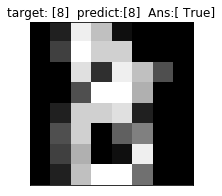

,0,1,2,3,4,5,6,7,8,9
0,50,0,0,0,0,0,0,0,1,0
1,0,40,0,1,0,0,0,0,1,0
2,0,0,39,0,0,0,0,2,0,0
3,0,0,0,40,0,0,0,0,0,0
4,0,1,0,0,49,0,0,1,0,1
5,0,0,0,1,0,43,0,0,1,3
6,0,1,0,0,1,0,46,0,0,0
7,0,0,0,1,0,0,0,40,0,0
8,0,3,0,1,0,0,0,0,40,1
9,0,1,0,0,0,0,0,1,1,39


In [13]:
#GradientBoostingClassifier with Standardlization
GBC_clf_ss = GradientBoostingClassifier()
GBC_ss_result = cross_val_score(GBC_clf_ss, x_train_ss, y_train_ss, scoring='accuracy', cv=5)
GBC_clf_ss.fit(x_train_ss, y_train_ss)
print('GBC_ss_result:{:.3} +/- {:.3} with 95% CI\n{}'.format(np.mean(GBC_ss_result), np.std(GBC_ss_result)*2, GBC_ss_result))
y_pred_GBC_ss = GBC_clf_ss.predict(x_test_ss)
print('GBC_test_ss_score:', np.mean(y_pred_GBC_ss == y_test_ss), metrics.accuracy_score(y_test_ss, y_pred_GBC_ss))
_ = predict_image(x_test_ss, y_test_ss.reshape(-1, 1), GBC_clf_ss)
GBC_ss_confusion = pd.DataFrame(metrics.confusion_matrix(y_test_ss, y_pred_GBC_ss), 
                             columns=digits.target_names, index=digits.target_names)
GBC_ss_confusion

RF_result:0.944 +/- 0.0212 with 95% CI
[0.92673993 0.94485294 0.95571956 0.94007491 0.95454545]
RF_test_score: 0.9422222222222222 0.9422222222222222
pick_up_idx_test_idx: 205


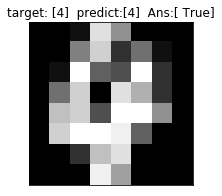

,0,1,2,3,4,5,6,7,8,9
0,51,0,0,0,0,0,0,0,0,0
1,0,41,0,0,0,0,0,0,1,0
2,0,2,39,0,0,0,0,0,0,0
3,0,0,0,40,0,0,0,0,0,0
4,0,0,0,0,51,0,0,1,0,0
5,0,0,0,0,3,42,0,0,0,3
6,1,1,0,0,0,0,46,0,0,0
7,0,0,0,0,0,0,0,41,0,0
8,0,6,2,0,0,0,0,0,36,1
9,0,1,0,2,0,1,0,1,0,37


In [14]:
#RandomForestClassifier
RF_clf = RandomForestClassifier()
RF_result = cross_val_score(RF_clf, x_train, y_train, scoring='accuracy', cv=5)
RF_clf.fit(x_train, y_train)
print('RF_result:{:.3} +/- {:.3} with 95% CI\n{}'.format(np.mean(RF_result), np.std(RF_result)*2, RF_result))
y_pred_RF = RF_clf.predict(x_test)
print('RF_test_score:', np.mean(y_pred_RF == y_test), metrics.accuracy_score(y_test, y_pred_RF))
_ = predict_image(x_test, y_test.reshape(-1, 1), RF_clf)
RF_confusion = pd.DataFrame(metrics.confusion_matrix(y_test, y_pred_RF), 
                             columns=digits.target_names, index=digits.target_names)
RF_confusion